# **Importing libraries**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, t, f
from scipy.stats import ttest_ind, ttest_rel, chi2_contingency
from scipy.stats import pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import f, f_oneway, kruskal, shapiro, levene, kstest

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 15.2MB/s]


# **1. Problem statement and perform exploratory data analysis**
- Yulu is **India's leading micro-mobility service provider**, which ***offers vehicles for daily commute***, who have recently suffered considerable dips in its revenues. So in the case study we're trying to analyse the factors affecting the deman for the shared electric cycles in the Indian market. The given factors for analysis are datetime, season, holiday, working day, weather, temperature, atemperature (what the temperature feels like), humidity, windspeed, casual, registered, count.
- Also, help the company in **analysing the variables which are significant for predicting the demand**  for the shared electric cycles in Indian market and how those variables describe demand.

In [ ]:
df = pd.read_csv("bike_sharing.csv?1642089089")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.tail() # To check the final date entry

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
df.shape

(10886, 12)

In [ ]:
# Checking out the data types and non-null entries present/column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#Checking for null values(Missing value detection)
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# Analysing the statistical properties of the data
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.describe(include=object)

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


**Value counts of each attribute and the number of unique value present in each**

In [ ]:
df["datetime"].value_counts()

2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64

In [ ]:
df["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
df["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [ ]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
df["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [ ]:
df['temp'].nunique()

49

In [ ]:
df["temp"].value_counts().head()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
Name: temp, dtype: int64

In [ ]:
df["atemp"].nunique()

60

In [ ]:
df["atemp"].value_counts().head()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
Name: atemp, dtype: int64

In [ ]:
df["humidity"].nunique()

89

In [ ]:
df["humidity"].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [ ]:
df["windspeed"].nunique()

28

In [ ]:
df["windspeed"].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: windspeed, dtype: int64

In [ ]:
df["casual"].value_counts()

0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: casual, Length: 309, dtype: int64

In [ ]:
df["registered"].value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

In [ ]:
df["count"].nunique()

822

In [ ]:
df["count"].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [ ]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["month"] = df["datetime"].dt.month
df["month"]

0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: month, Length: 10886, dtype: int64

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1


In [ ]:
#Total count of electrical vehicles used in each season
df.groupby("season")["count"].sum()

season
1    312498
2    588282
3    640662
4    544034
Name: count, dtype: int64

In [ ]:
#Total count of electrical vehicles under different weather
df.groupby("weather")["count"].sum()

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

In [ ]:
df.groupby("month")["count"].sum()

month
1      79884
2      99113
3     133501
4     167402
5     200147
6     220733
7     214617
8     213516
9     212529
10    207434
11    176440
12    160160
Name: count, dtype: int64

**Conversion of "temp" and "atemp" data to categorical variable for better analysis**

In [ ]:
df["temp_cat"] = pd.cut(df["temp"], bins = [0,10,20,30,42], labels = ["very low", "low", "moderate", "high"])
df["atemp_cat"] = pd.cut(df["atemp"], bins = [0,10,20,30,40,46], labels = ["very low","low", "moderate", "high", "very high"])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,temp_cat,atemp_cat
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,very low,low
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,very low,low
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,very low,low
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,very low,low
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,very low,low


In [ ]:
temp_cat = df["temp_cat"].value_counts()
temp_cat

moderate    4334
low         4049
very low    1259
high        1244
Name: temp_cat, dtype: int64

In [ ]:
df.groupby("temp_cat")["count"].sum()

temp_cat
very low     92141
low         609233
moderate    968265
high        415837
Name: count, dtype: int64

In [ ]:
atemp_cat = df["atemp_cat"].value_counts()
atemp_cat

moderate     3964
high         3101
low          3095
very low      577
very high     149
Name: atemp_cat, dtype: int64

In [ ]:
df.groupby("atemp_cat")["count"].sum()

atemp_cat
very low      38849
low          387514
moderate     711190
high         899883
very high     48040
Name: count, dtype: int64

In [ ]:
df["registered"].sum(), df["casual"].sum()

(1693341, 392135)

## ***Univarieate analysis***

<Axes: xlabel='weather', ylabel='count'>

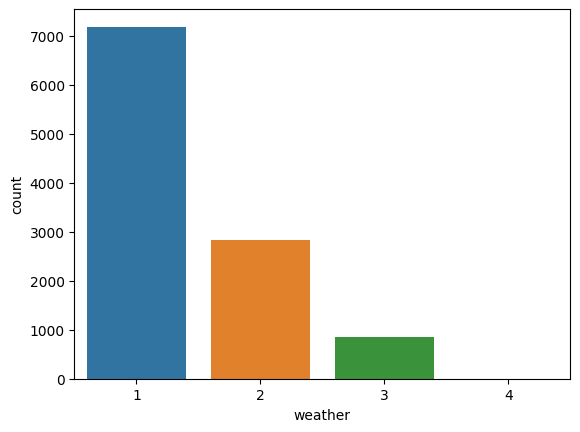

In [ ]:
sns.countplot(x=df["weather"])

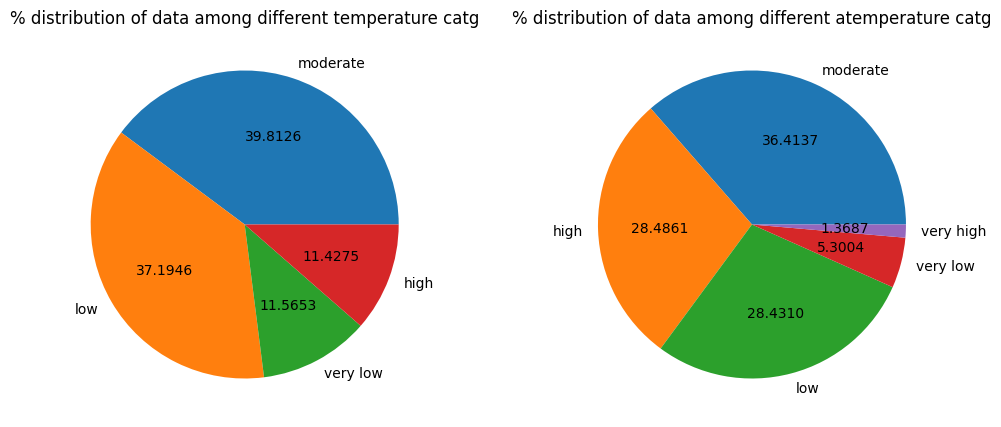

In [ ]:
fig,ax= plt.subplots(nrows=1, ncols=2, figsize = (12,5))
ax[0].pie(temp_cat, labels = temp_cat.index, autopct = "%.4f")
ax[1].pie(atemp_cat, labels = atemp_cat.index, autopct = "%.4f")
ax[0].set_title("% distribution of data among different temperature catg")
ax[1].set_title("% distribution of data among different atemperature catg")
plt.show()

## **Bivarieate Analysis**

<Axes: xlabel='season', ylabel='count'>

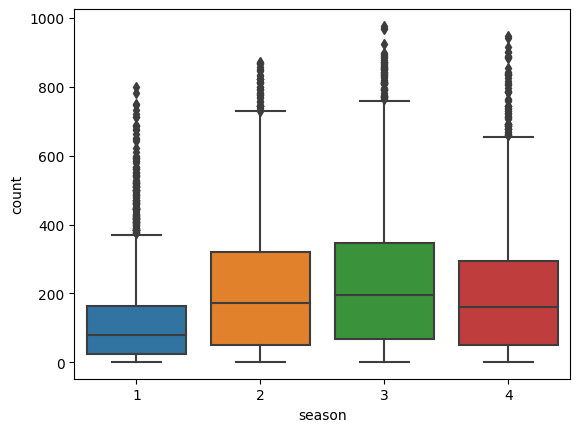

In [ ]:
sns.boxplot(x= df["season"], y=df["count"])

<Axes: xlabel='month', ylabel='humidity'>

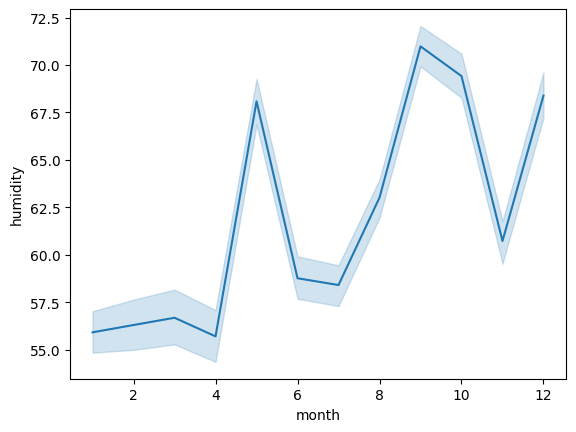

In [ ]:
sns.lineplot(x=df["month"], y = df["humidity"])

<Axes: xlabel='temp_cat', ylabel='count'>

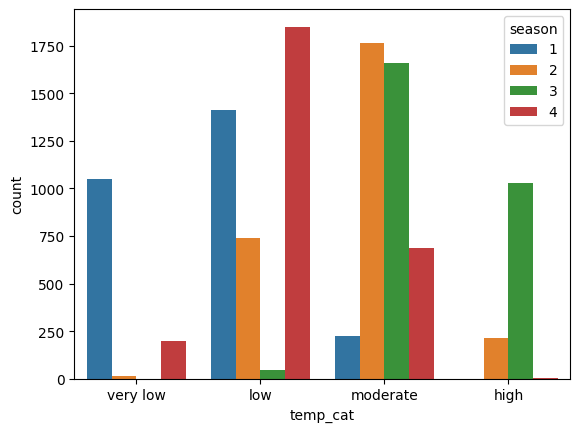

In [ ]:
sns.countplot(x=df["temp_cat"], hue = df["season"])

<Axes: xlabel='temp_cat', ylabel='count'>

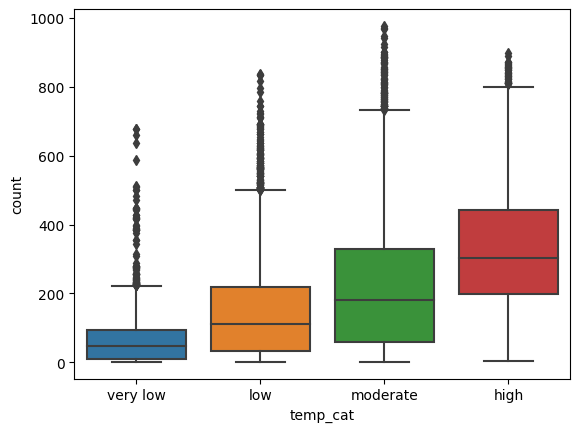

In [ ]:
sns.boxplot(x=df["temp_cat"], y = df["count"])

<Axes: xlabel='atemp_cat', ylabel='Count'>

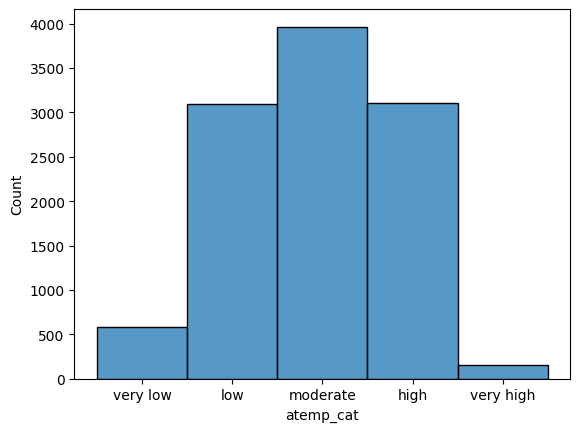

In [ ]:
sns.histplot(x=df["atemp_cat"])

<Axes: xlabel='season', ylabel='windspeed'>

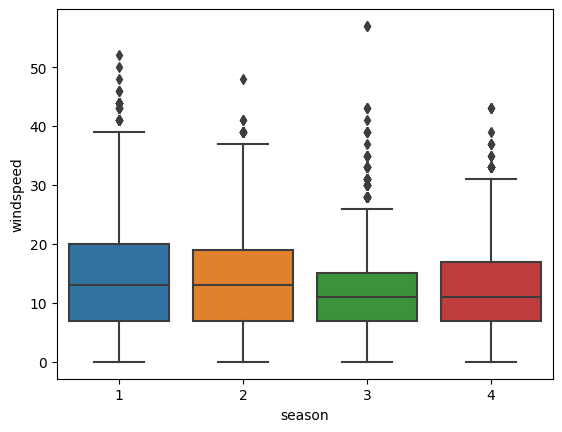

In [ ]:
sns.boxplot(x=df["season"], y=df["windspeed"])

In [ ]:
df.corr()

<ipython-input-46-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451


In [ ]:
pearsonr(df["temp"], df["atemp"])

PearsonRResult(statistic=0.9849481104817074, pvalue=0.0)

<ipython-input-48-96d6703ada2e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

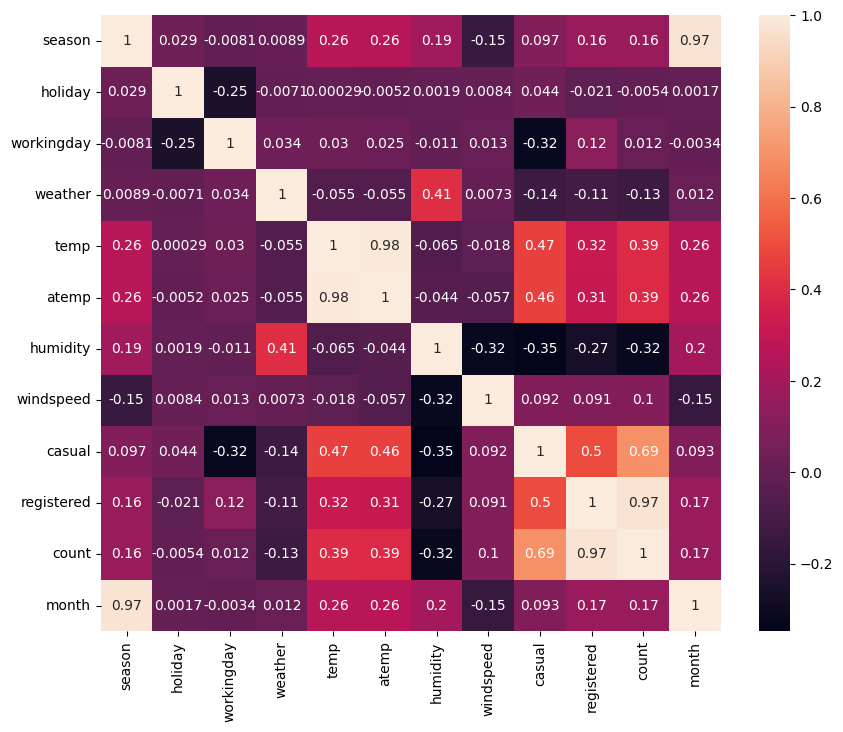

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

## ***Outliers of various Attributes***

**Temperature outlier analysis**

In [ ]:
Q1 = np.percentile(df["temp"],25)
Q2 = np.percentile(df["temp"],50)
Q3 = np.percentile(df["temp"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Temperature IQR :", IQR)

Q1 : 13.94
Q2 : 20.5
Q3 : 26.24
Temperature IQR : 12.299999999999999


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 44.69
Lower whisker : 0


**Atemp(feels like temperature) outlier**

In [ ]:
Q1 = np.percentile(df["atemp"],25)
Q2 = np.percentile(df["atemp"],50)
Q3 = np.percentile(df["atemp"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Atemperature IQR :", IQR)

Q1 : 16.665
Q2 : 24.24
Q3 : 31.06
Atemperature IQR : 14.395


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 52.6525
Lower whisker : 0


**Humidity outlier**

In [ ]:
Q1 = np.percentile(df["humidity"],25)
Q2 = np.percentile(df["humidity"],50)
Q3 = np.percentile(df["humidity"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Humidity IQR :", IQR)

Q1 : 47.0
Q2 : 62.0
Q3 : 77.0
Humidity IQR : 30.0


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 122.0
Lower whisker : 2.0


**Windspeed outlier**

In [ ]:
Q1 = np.percentile(df["windspeed"],25)
Q2 = np.percentile(df["windspeed"],50)
Q3 = np.percentile(df["windspeed"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Windspeed IQR :", IQR)

Q1 : 7.0015
Q2 : 12.998
Q3 : 16.9979
Windspeed IQR : 9.996400000000001


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0.0000))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 31.992500000000003
Lower whisker : 0.0


**Casual users outlier**

In [ ]:
Q1 = np.percentile(df["casual"],25)
Q2 = np.percentile(df["casual"],50)
Q3 = np.percentile(df["casual"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Casual users IQR :", IQR)

Q1 : 4.0
Q2 : 17.0
Q3 : 49.0
Casual users IQR : 45.0


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 116.5
Lower whisker : 0


**Registered users outlier**

In [ ]:
Q1 = np.percentile(df["registered"],25)
Q2 = np.percentile(df["registered"],50)
Q3 = np.percentile(df["registered"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Registered users IQR :", IQR)

Q1 : 36.0
Q2 : 118.0
Q3 : 222.0
Registered users IQR : 186.0


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 501.0
Lower whisker : 0


**Total count of users oulier**

In [ ]:
Q1 = np.percentile(df["count"],25)
Q2 = np.percentile(df["count"],50)
Q3 = np.percentile(df["count"],75)
IQR = Q3-Q1
print("Q1 :", Q1)
print("Q2 :", Q2)
print("Q3 :", Q3)
print("Total count of users IQR :", IQR)

Q1 : 42.0
Q2 : 145.0
Q3 : 284.0
Total count of users IQR : 242.0


In [ ]:
Upper_whisker = Q3+ (1.5*IQR)
Lower_whisker = (max(Q1- (1.5*IQR),0))
print("Upper whisker :", Upper_whisker)
print("Lower whisker :", Lower_whisker)

Upper whisker : 647.0
Lower whisker : 0


## **Insights based on EDA**

### ***I. Range of Attributes***
- In the given date and time columns the **date ranges from 1st Jan, 2011 to 19th Dec, 2012**(data for precisely 2 years)
- For the **season column**, season has been divided into 4, **1 as Spring, 2 as Summer, 3 as Fall, 4 as Winter.**
- Holiday column is divided into 2 categories alone, 0 meaning NO Holiday and 1 means Holidays. This column doesn't take weekends into consideration.
- Working day column is again divided into categories as 0 and 1, if its not a holiday or a weekend the the value is 1, if not 0.
- **Temperature** column has temperature given is celsius and it ranges from **0.82 degree celsius to 41 degree celsius**
- A column called **"atemp"** is given in this column the temperature mentioned is based on ***what it feels like at a certain given temperature*** on that particular day and it ranges from **0.76 degree celsius to 45.45 degree celsius**.
- Humidity column gives the measurement of mean humidity on that particular day. It ranges from **0 to solid 100**.
- **Windspeed** column has speed of the wind given and it ranges from **0.00 to 56.99**
- **Casual** users are the unregistered users who rents the bike on the particular day. The range of users goes from** 0(min) to 367(max).**
- **Registered users** are the ones who rents the bike each day and has it registered and the user numbers vary from **0(min) to 886(max)**
- **Count** column has the **sum of both casual and registered users** on that particular day.

### ***ii. Distribution of variables and relationship between them***
- All the season have more than 2680 entries in each, the least observed season is **Season 1 with 2686 entries** and most observed is **Season 4 with 2734 entries**
- In the holiday column, out of all the data only **311 days have been observed as holidays** and rest of 10,575 are working days/weekends.
- In Working days, **7412 days are working days**, the rest of 3474 are holidays/weekends.
- Of the 4 given weather types, the **most observed weather is category 1(Clear, few clouds, partky cloudy days) with 7192 records** and least is 4(Heavy rain, ice pellets, thunderstorm or foggy days) with only 1 record.
- 49 different temperature have been observed across datas, in which the most dominant temperature is **14.76 degree celsius with 467 entries**, **26.24 degree celsius with 453 entries**, **28.7 degree celsius with 427 entries**.
- **"atemp" column has 60 different** temperature values, the most common temperature feel being **31.06 degree celsius with 671 entries**, 25.76 being the next most common entries.
- Humidity values has 89 different values observed across data. 88, 94, 83,
87, 70 being the most common humidity ranges.
- 28 different windspeed has been observed of which the **most common one with 1313 entries is 0.00**, followed by 8.99 with 1120 entries. And 11.00, 12.99, and 7.00 with more than 1000 entries.
- 0 is the leading count for casual users, that is a **total of 986 days have not observed any casual user count**, just 1 user for 667 days, 2 users for 487 days, 3 users for 438 days and so on are the respective casual users observation.
But there are also days where yulu has witnessed more than 300+ users many a times.The maximum casual users count in a day is 367 and minimum is 0
- Atleast 3 registered users have used the electric vehicle for more tha 195 days, 4 reg. users for 190 days, 5 reg. users for 177 days and 6 reg. users for 155 days. The **maximum registered users count in a day is 886** and **minimum is 0.**
- Count column which is the sum of casual + registered users range from **1(minimum) to 997(maximum)** in a given day. The most frequently observed count is 5 for 195 days.

### ***Comments on Univariate and Bivariate plots***
**Univariate Plots**
- On creating countplot for the count of vehicles used across different weather conditions have shown that, the most dominant usage of vehicles is during is weather 1(Which means clear, few clouds or partly cloudy) which shows that **weather 1 is the most suitable one for Yulu vehicles usage with more than 7000 records**, followed by weather 2(which is misty+cloudy) with 3000 records. Total number of vehicles used in each weather category are, **category 1 with 1476063 vehicle count**, category 2 with 507160 count, category 3 with 102089 count and finally **category 4 of weather(Heavy rains+ pellets+ thunderstorm+ fog) with ONLY 164 vehicle count**
- Next on performing pie chart analysis between both the temp_categories and atemp categories, it is found that **"Moderate"(~40%) and "low"(37%) are most preferred temperature to use yulu vehicles**. As for the atemp_categories, it is **"moderate"(36.4%), "high"(28.4%) and "moderate"(28.4%) are the preferred atemp(feels like) to use Yulu vehicles.**

**Bivariate and Multivariate analysis**
- a boxplot analysis was done for all four seasons and the mean vehicle count across each season was calculated and analysed, from that analysis it was found that **highest mean was observed in 3rd season(Fall) which is close to 200 and total rented vehicle in that season is 640662.** Second highest mean was observed in 2nd seson(summer) with 190 approximate mean and total count of 588282. **Lowest was observed in 1st season (Spring) with 312498 count and mean less than 100.**
- A lineplot based on humidity was plotted across the month wise data available and it is found that **May, september, october and december(67.5 to 71.5) witness highest humidity ranges**, whereas **January to April witness the lowest around 56.**
- A countplot was plotted for various temperature categories and observed the range across seasons. The result says that **season 4 and 1(winter and spring) witnesses the lowest temperatures** and **season 2 and 3(Summer and fall) witnesses moderate temperature**. This can be a reson why season 1 and 4 has relatively less rented vehicle count than 2 and 3.
- Another boxplot analysis was done across temperate categories and count of rented vehicles and its significantly clearly that the** mean count of rented vehicles are observed more in days with higher temperature(31 to 42 degree celsius)**. And lowest at very low temperature(0-10 degree celsius).
- Histplot analysis was done across atemperate categories and count of rented vehicles, and the result shows that **moderate temperature(feels like 20-30 degree celsius) has the most entries.**
- A boxplot analysis to observe the windspeed across seasons was done, and it is shown that 1st an snd season have highest windspeed mean than the other two.

**Correlation**
- When looked at the correlated datas in the given dataframe, it is observed that the maximum correlation is found between "temp" and "atemp" datas with 0.98 correlation stat followed by the correlation between "count" and "registered" columns with 0.97 stat and "count" and "casual" column with 0.69 stat. Apart from that "registered" and "column" also had 0.5 stat.

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000


# **2. Hypothesis Testing**

## ***i. Working Day has effect on number of electric cycles rented***

In [ ]:
# Filtering the count of electric cycles rented in working days and holidays
df_workrent = df.loc[df["workingday"]== 1]["count"]
df_holrent = df.loc[df["workingday"] == 0]["count"]
df_workrent.mean(), df_holrent.mean()

(193.01187263896384, 188.50662061024755)

**Assumption test**

In [ ]:
# Levene test
x_stat, p_value = levene(df_workrent, df_holrent)
print("x_stat :", x_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho")
else:
  print("Fail to reject Ho")

x_stat : 0.004972848886504472
p_value : 0.9437823280916695
Fail to reject Ho


**Visual test**

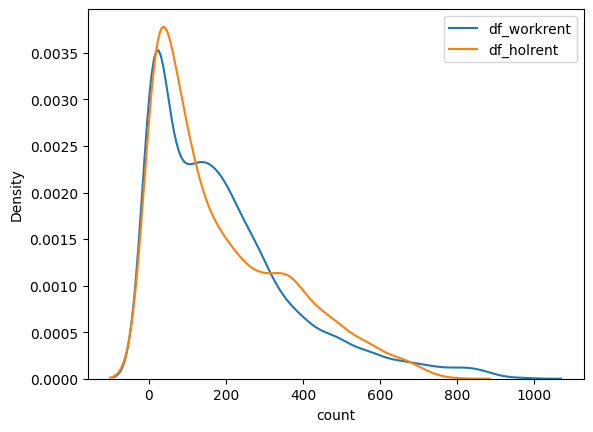

In [ ]:
sns.kdeplot(df_workrent)
sns.kdeplot(df_holrent)
plt.legend(["df_workrent", "df_holrent"])

***Ttest of independence (to find if the working days have affected the electric cycles rentals or not)***

In [ ]:
#Ho : Electric cycles rentals has no effect on working day or a holiday
#Ha : Electric cycles rentals has effect on working day and holiday

t_stat, p_value = ttest_ind(df_workrent, df_holrent, alternative = "greater")
print("t_stat :", t_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Electric cycles rentals has effect if its a working day or holiday")
else:
  print("Fail to reject Ho : Electric cycles rentals has no effect if its a working day or holiday")

t_stat : 1.2096277376026694
p_value : 0.11322402113180674
Fail to reject Ho : Electric cycles rentals has no effect if its a working day or holiday


## ***ii. No. of cycles rented similar or different in different seasons***

In [ ]:
rental_s1 = df[df["season"] == 1]["count"]
rental_s2 = df[df["season"] == 2]["count"]
rental_s3 = df[df["season"] == 3]["count"]
rental_s4 = df[df["season"] == 4]["count"]

**Assumption test**

In [ ]:
# kruskal test
f_stat, p_value = kruskal(rental_s1, rental_s2, rental_s3, rental_s4)
print("f_stat :", f_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Atleast one of them is different")
else:
  print("Fail to reject Ho")

f_stat : 699.6668548181988
p_value : 2.479008372608633e-151
Reject Ho : Atleast one of them is different


**Visual test**

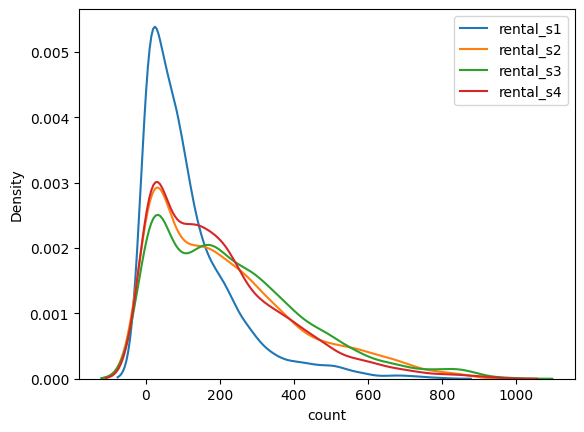

In [ ]:
sns.kdeplot(rental_s1)
sns.kdeplot(rental_s2)
sns.kdeplot(rental_s3)
sns.kdeplot(rental_s4)
plt.legend(["rental_s1", "rental_s2","rental_s3", "rental_s4"])

***ANOVA test (to find if the no. of cycles rented is similar or different in different seasons)***

In [ ]:
# Ho: No. of cycles rented are similar in different seasons
# Ha: No. of cycles rented are different in different seasons

f_stat, p_value = f_oneway(rental_s1, rental_s2, rental_s3, rental_s4)
print("f_stat :", f_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : No. of cycles rented are different in different seasons")
else:
  print("Fail to reject Ho: No. of cycles rented are similar in different seasons")

f_stat : 236.94671081032106
p_value : 6.164843386499654e-149
Reject Ho : No. of cycles rented are different in different seasons


## ***iii. No. of cycles rented similar or different in different weather***

In [ ]:
rental_w1 = df[df["weather"] == 1]["count"]
rental_w2 = df[df["weather"] == 2]["count"]
rental_w3 = df[df["weather"] == 3]["count"]
rental_w4 = df[df["weather"] == 4]["count"]

**Assumption test**

In [ ]:
# kruskal test
f_stat, p_value = kruskal(rental_w1, rental_w2, rental_w3, rental_w4)
print("f_stat :", f_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : Atleast one of them is different")
else:
  print("Fail to reject Ho")

f_stat : 205.00216514479087
p_value : 3.501611300708679e-44
Reject Ho : Atleast one of them is different


**Visual test**

<ipython-input-74-a79fe6d51720>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(rental_w4)


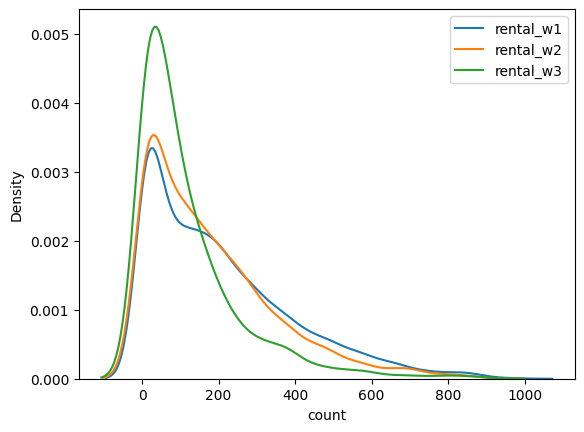

In [ ]:
sns.kdeplot(rental_w1)
sns.kdeplot(rental_w2)
sns.kdeplot(rental_w3)
sns.kdeplot(rental_w4)
plt.legend(["rental_w1", "rental_w2","rental_w3", "rental_w4"])

***ANOVA test (to find if the no. of cycles rented is similar or different in different weather)***

In [ ]:
# Ho: No. of cycles rented are similar in different weather
# Ha: No. of cycles rented are different in different weather

f_stat, p_value = f_oneway(rental_w1, rental_w2, rental_w3, rental_w4)
print("f_stat :", f_stat)
print("p_value :", p_value)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho : No. of cycles rented are different in different weather")
else:
  print("Fail to reject Ho: No. of cycles rented are similar in different weather")

f_stat : 65.53024112793271
p_value : 5.482069475935669e-42
Reject Ho : No. of cycles rented are different in different weather


## ***iv. Weather is dependent on season (check between 2 predictor variable)***

In [ ]:
season_weather = pd.crosstab(columns = df["weather"], index = df["season"], margins = True)
season_weather

weather,1,2,3,4,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


***Chisquare(Test of Independence)***

In [ ]:
# Ho : Weather is not dependent on the season
# Ha : Weather is dependent on the season

chi_stat, p_value, dof, expected = chi2_contingency(season_weather)
print("chi_stat :", f_stat)
print("p_value :", p_value)
print("dof :", dof)
print("Expected :", expected)
alpha = 0.05

if p_value < alpha:
  print("Reject Ho: Weather is dependent on the season")
else:
  print("Fail to reject Ho: Weather is not dependent on the season")

chi_stat : 65.53024112793271
p_value : 3.1185273325126814e-05
dof : 16
Expected : [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01
  2.68600000e+03]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01
  2.73300000e+03]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01
  2.73300000e+03]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01
  2.73400000e+03]
 [7.19200000e+03 2.83400000e+03 8.59000000e+02 1.00000000e+00
  1.08860000e+04]]
Reject Ho: Weather is dependent on the season


# **Insights and Recommendations**

**INSIGHTS**
- **Moderate temperature(20-30 degree celsius)** is the temperature with has **highest number of users**.
- **Moderate(20-30) and high(30-40 degree celsius)** are the **temperature(atemp)** felt by people which has again observed highest number of users.
- Working days or Holidays doesn't have any significant effect over the electric cycles rented.
- **Seasons and weather DOES HAVE a significant effect in electric cycles rented **by the users.
- Months **January to April witness the lowest humidity range**, May, september, october and Decen=mber have high humidity range.
- Also seasons does have significant impact over the weather.

**RECOMMENDATIONS**
- Months **5(May) to 10(Oct) shows good amount of rentals** compared to the other, could be mainly due to the season and weather, since we don't have control over the weather, giving some **offers in the peak season might boost the sales**.
- And in the off seasons **providing shelters at a certain interval** in a given distance **can encourage more people to rent more**, so that they can use that shelter in times of need.
- Moderate and high temperature hours sees high rentals, care should ve taken to retain the loyal customers by providing them special offers.
- Total **count of registered rentals is 1693341** and total **count of casual electric cycles rentals is 392135**. If a casual rental person is frequent user of the Yulu vehicle, then he should be introduced to the **special benefits of a registered user**